In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../../data/telecom_churn.csv')

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# 1. Признаки по одному 
## 1.1. Количественные
Гистограмма и боксплот

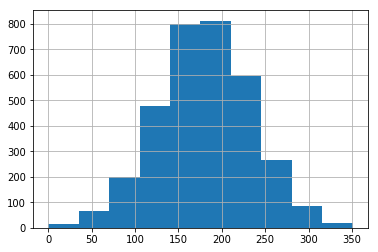

In [4]:
df['Total day minutes'].hist();

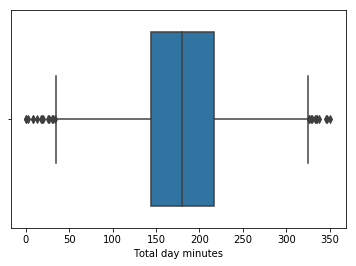

In [5]:
sns.boxplot(df['Total day minutes']);

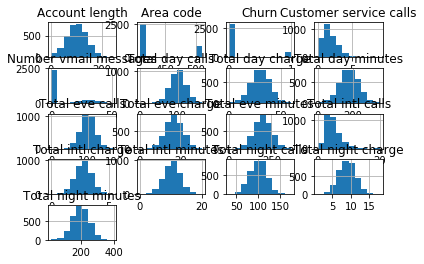

In [6]:
df.hist();

# 1.2. Категориальные
countplot

In [7]:
df['State'].value_counts().head()

WV    106
MN     84
NY     83
AL     80
WI     78
Name: State, dtype: int64

In [8]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

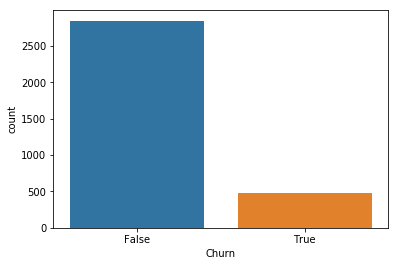

In [9]:
sns.countplot(df['Churn']);

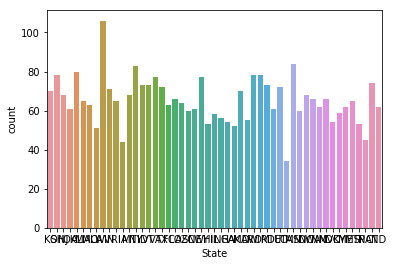

In [10]:
sns.countplot(df['State']);

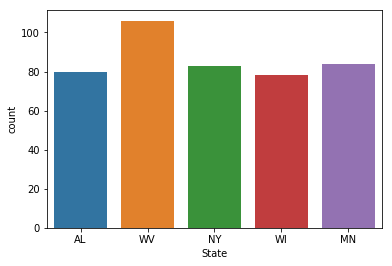

In [11]:
sns.countplot(df[df['State'].\
                 isin(df['State'].value_counts().head().index)]['State']);

# 2. Взаимодействия признаков
## 2.1. Количественный с количественным
pairplot, scatterplot, корреляции, heatmap

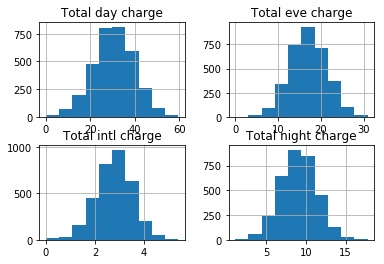

In [12]:
feat = [f for f in df.columns if 'charge' in f]

df[feat].hist();

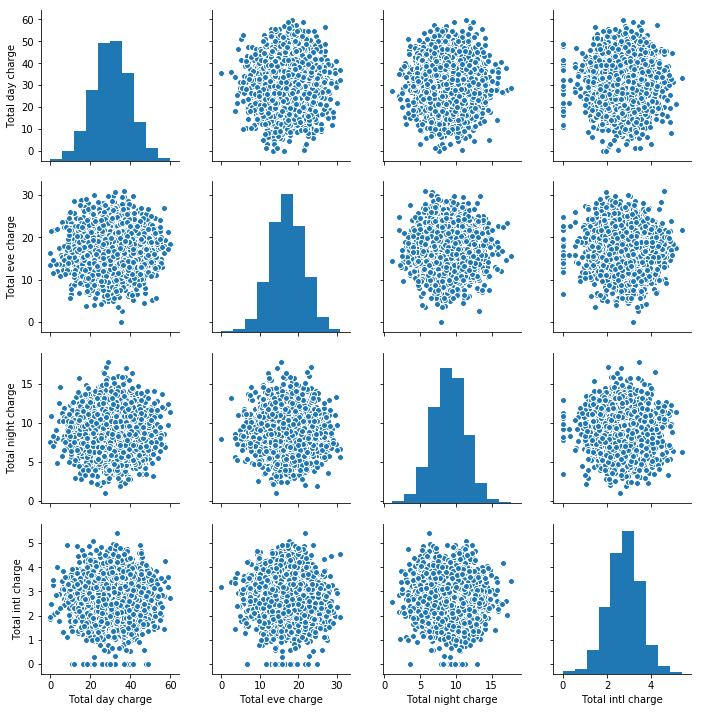

In [13]:
sns.pairplot(df[feat]);

In [14]:
df['Churn'].map({False: 'blue', True: 'orange'}).head()

0    blue
1    blue
2    blue
3    blue
4    blue
Name: Churn, dtype: object

In [15]:
df[~df['Churn']].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


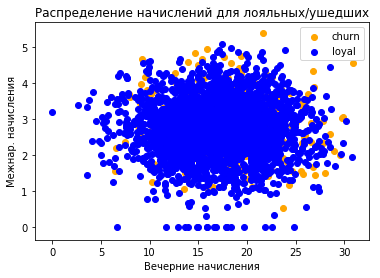

In [16]:
plt.scatter(df[df['Churn']]['Total eve charge'], 
            df[df['Churn']]['Total intl charge'],
           color='orange', label='churn');
plt.scatter(df[~df['Churn']]['Total eve charge'], 
            df[~df['Churn']]['Total intl charge'],
           color='blue', label='loyal');
plt.xlabel('Вечерние начисления');
plt.ylabel('Межнар. начисления');
plt.title('Распределение начислений для лояльных/ушедших');
plt.legend();

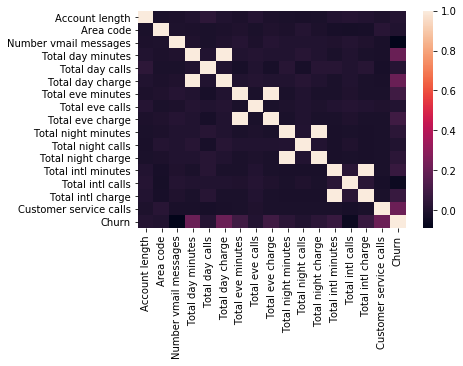

In [17]:
sns.heatmap(df.corr());

In [18]:
df.drop(feat, axis=1, inplace=True)

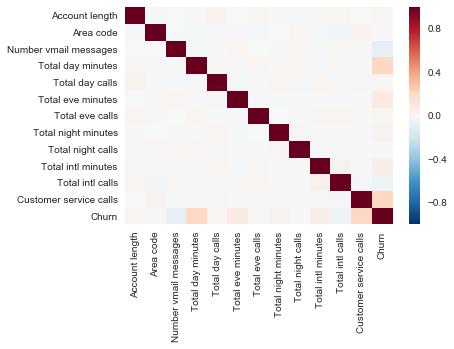

In [19]:
sns.heatmap(df.corr());

## 2.2.  Количественный с категориальным
boxplot, violinplot

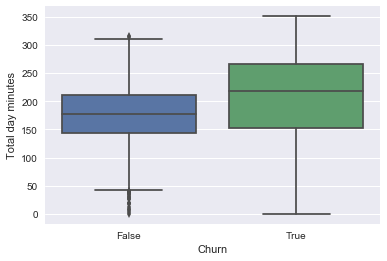

In [20]:
sns.boxplot(x='Churn', y='Total day minutes', data=df);

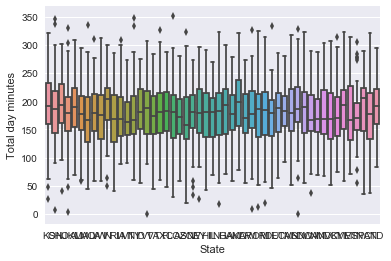

In [21]:
sns.boxplot(x='State', y='Total day minutes', data=df);

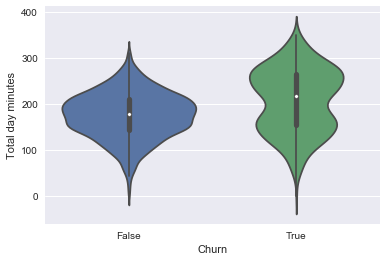

In [22]:
sns.violinplot(x='Churn', y='Total day minutes', data=df);

In [23]:
df.groupby('International plan')['Total day minutes'].mean()

International plan
No     178.893887
Yes    187.986997
Name: Total day minutes, dtype: float64

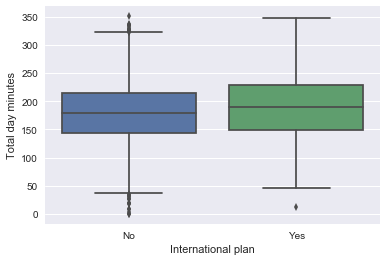

In [24]:
sns.boxplot(x='International plan', y='Total day minutes', data=df);

## 2.3. Категориальный с категориальным
countplot

In [25]:
pd.crosstab(df['Churn'], df['International plan'])

International plan,No,Yes
Churn,,
False,2664,186
True,346,137


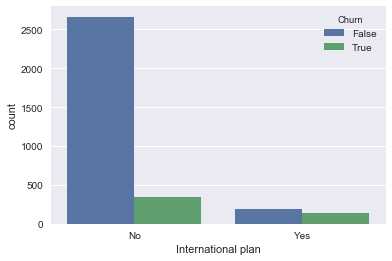

In [26]:
sns.countplot(x='International plan', hue='Churn', data=df);

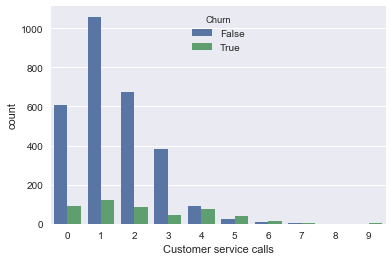

In [27]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);

## 3. Прочее
Manifold learning, один из представителей – t-SNE

In [28]:
from sklearn.manifold import TSNE

In [29]:
tsne = TSNE(random_state=0)

In [34]:
df2 = df.drop(['State', 'Churn'], axis=1)

In [35]:
df2['International plan'] = df2['International plan'].map({'Yes': 1, 
                                                             'No': 0})
df2['Voice mail plan'] = df2['Voice mail plan'].map({'Yes': 1, 
                                                             'No': 0})

In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 14 columns):
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null int64
Voice mail plan           3333 non-null int64
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Customer service calls    3333 non-null int64
dtypes: float64(4), int64(10)
memory usage: 364.6 KB


In [37]:
%%time
tsne.fit(df2)

CPU times: user 25.9 s, sys: 3.37 s, total: 29.2 s
Wall time: 28.9 s


TSNE(angle=0.5, early_exaggeration=4.0, init='random', learning_rate=1000.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=30,
   perplexity=30.0, random_state=0, verbose=0)

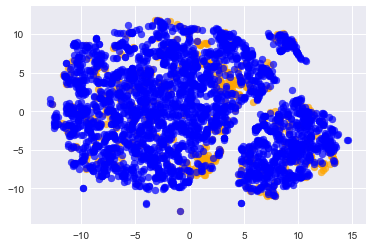

In [40]:
plt.scatter(tsne.embedding_[df['Churn'].values, 0], 
            tsne.embedding_[df['Churn'].values, 1], 
            color='orange', alpha=.7);
plt.scatter(tsne.embedding_[~df['Churn'].values, 0], 
            tsne.embedding_[~df['Churn'].values, 1], 
            color='blue', alpha=.7);